In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from astro310 import *

#plot_defaults()

In [2]:
LSUN = 3.83E26
RSUN = 6.96E8
MSUN = 1.99E30

G = 6.67E-11
SIGMA = 5.67E-8

In [3]:
data = np.genfromtxt('adopt.csv', skip_header=1, delimiter=',')

print(np.shape(data))

(32, 7)


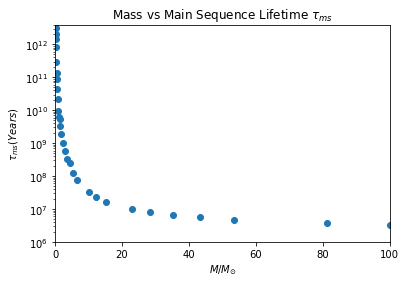

In [15]:
plt.scatter(data[:,2], (data[:,6] * 2))
plt.yscale('log')
plt.xlim(0, 100)
plt.ylim(1e6, 4e12)
plt.xlabel(r'$M/M_{\odot}$')
plt.ylabel(r'$\tau_{ms} (Years)$')
plt.title(r'Mass vs Main Sequence Lifetime $\tau_{ms}$')
plt.savefig('mass_vs_lifetime.pdf')

In [5]:
#According to the graph above, the most likely star to have been visable in the sky during the end of the Cretaceous period 
#65 million years ago would have been Arcturus with a Solar mass of 1. 

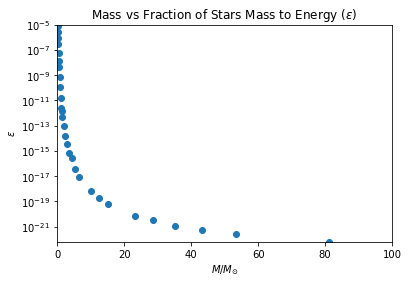

In [6]:
epsilon = []
for i in range(32):
    epsilon.append(data[i,6]/((4.5e20)*(data[i,2])*(data[i,3])))
    
plt.scatter(data[:,2], epsilon)
plt.yscale('log')
plt.xlim(0, 100)
plt.ylim(6e-23, 1e-5)
plt.xlabel(r'$M/M_{\odot}$')
plt.ylabel(r'$\epsilon$')
plt.title(r'Mass vs Fraction of Stars Mass to Energy $(\epsilon)$')
plt.savefig('mass_vs_energy_fraction.pdf')

In [7]:
#It seems that the low mass stars have the greatest fraction of their mass turned into energy making the low mass stars the most
#efficient and high mass stars least efficient. 

In [8]:
epsilon_mean = np.mean(epsilon)

print(epsilon_mean)

3.52686974774e-06


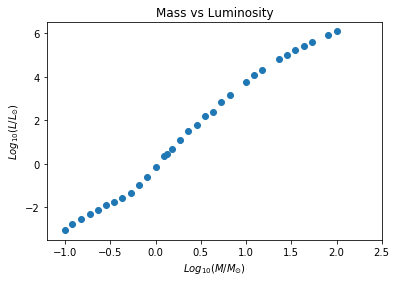

In [9]:
plt.scatter(np.log10(data[:,2]), np.log10(data[:,3]))
#plt.yscale('log')
plt.xlim(-1.2, 2.5)
plt.ylim(-3.5, 6.5)
plt.xlabel(r'$Log_{10}(M/M_{\odot})$')
plt.ylabel(r'$Log_{10}(L/L_{\odot})$')
plt.title(r'Mass vs Luminosity')
plt.savefig('log_mass_vs_log_luminsity.pdf')

In [10]:
#Just using eyesight, I took the point about = (1, 4) = (log10(M/Mdot), log10(L/Ldot))
#log10(L/Ldot) is about = v * log10(M/Mdot) + c where c is about = 0
#v = (log10(L/Ldot) / log10(M/Mdot)) = 4/1 = 4 as my approximate estimate for the value v

In [11]:
nu, c = np.polyfit(np.log10(data[:,2]), np.log10(data[:,3]), 1)

print(nu, c)

3.33516242629 0.055588942331


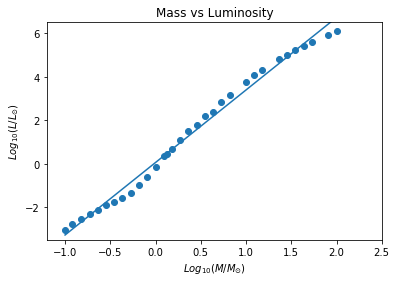

In [12]:
x = np.linspace(-1.0, 2.0, 10)
y = (3.33516242629) * x + (0.055588942331)

plt.scatter(np.log10(data[:,2]), np.log10(data[:,3]))
plt.plot(x, y)
#plt.yscale('log')
plt.xlim(-1.2, 2.5)
plt.ylim(-3.5, 6.5)
plt.xlabel(r'$Log_{10}(M/M_{\odot})$')
plt.ylabel(r'$Log_{10}(L/L_{\odot})$')
plt.title(r'Mass vs Luminosity')
plt.savefig('log_mass_vs_log_luminsity_w_fit_line.pdf')

In [13]:
#The fit line seems to fit a little over than the curve for low and high mass stars, but under the curve for mid mass stars. 

In [16]:
#Using the mass-luminosity relation, (L/Ldot) = 10^c (M/Mdot)^v, I turned the equation, T(ms) = epsilon(bar)Mc^2 / L to
#T(ms) = epsilon(bar)Mc^2 / M^v where epsilon(bar) = 3.52686974774e-06 and v = 3.33516242629 in this case

#The lifetimes of high mass stars have been shown earlier to have much smaller lifetimes than those with low masses, even though 
#they have "more fuel" to go through. This is shown in the equation bcause the denomenator of the equation is the mass of the 
#star raised to an exponent, meaning the higher the mass, the exponentially lower its lifetime will become. 

In [17]:
alpha, y = np.polyfit(np.log10(data[:,2]), np.log10(data[:,4]), 1)

print(alpha, y)

0.686541190275 -0.0990127750865


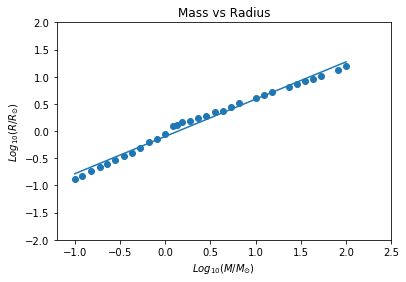

In [20]:
v = np.linspace(-1.0, 2.0, 10)
w = (0.686541190275) * v + (-0.0990127750865)

plt.scatter(np.log10(data[:,2]), np.log10(data[:,4]))
plt.plot(v, w)
#plt.yscale('log')
plt.xlim(-1.2, 2.5)
plt.ylim(-2, 2)
plt.xlabel(r'$Log_{10}(M/M_{\odot})$')
plt.ylabel(r'$Log_{10}(R/R_{\odot})$')
plt.title(r'Mass vs Radius')
plt.savefig('log_mass_vs_log_radius_w_fit_line.pdf')

In [21]:
#Based on alpha = 0.686541190275 and using the equations rho = 3M/4(pi)R^3 and (R/Rdot) = (M/Mdot)^alpha, there would still be 
#a component of mass with an exponent slightly greater than 1 in the denomenator, meaning that the mean density of a star would
#decrease with the increase of its mass. 

In [22]:
#PART II

In [23]:
starH = read_history('ezweb_sun.zip')
starP = read_profile('ezweb_sun.zip', 1)

In [24]:
help(read_history)
help(read_profile)

Help on function read_history in module astro310:

read_history(filename)
    Read history data from an EZ-Web output zip file
    
    Parameters
    ----------
    
    filename : string giving name of zip file
    
    Returns
    -------
    
    data: dictionary containing the history data. The following keys/values 
          appear in the dictionary:
    
        i         step index (gives index of corresponding profile)
        t         age (years)
        M         mass (Msun)
        log_L     log10(luminosity / Lsun)
        log_R     lop10(radius / Rsun)
        logT_s    log10(surface temperature / K)
        log_T_c   log10(central temprature / K)
        log_rho_c log10(central density / kg/m^3)
        log_P_c   log10(central pressure / N/m^2)
        Psi_c     central electron degeneracy parameter
        X_c       central hydrogen mass fraction
        Y_c       central helium mass fraction
        X_Cc      central carbon mass fraction
        X_Nc      central nit

In [32]:
L_compared = 10**starH['log_L']
print(L_compared[0])

R_compared = 10**starH['log_R']
print(R_compared[0])

L = 10**starH['log_L']*LSUN
print(L[0])

R = 10**starH['log_R']*RSUN
print(R[0])

Teff = (L/(4*np.pi*R**2*SIGMA))**0.25
print(Teff[0])

0.700396738403
0.88565183196
2.68251950808e+26
616413675.044
5610.49731749


In [31]:
time = starH['t']

for i in range(875):
    loopVariable = time[i]
    if 4.5e9 > loopVariable:
        index = i
    else:
        index = i
        break
        
print(index)

print(4.5e9 - time[index]) #this index number(65) is closer to the desired lifetime
print(4.5e9 - time[index - 1])

65
-60212280.0
103186660.0


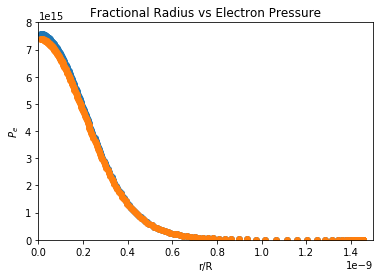

In [45]:
calc_P_e = starP['n_e'] * (1.38e-23) * starP['T']

plt.scatter(starP['r'] / R[0], starP['P_e'])
plt.scatter(starP['r'] / R[0], calc_P_e)
#plt.yscale('log')
plt.xlim(0, 1.5e-9)
plt.ylim(0, 8e15)
plt.xlabel(r'r/R')
plt.ylabel(r'$P_e$')
plt.title(r'Fractional Radius vs Electron Pressure')
plt.savefig('radius_vs_ele_pressure.pdf')

In [46]:
#Both of the P_e graphs seem to line up very close to each other. However, the electrons seem to depart from the behavior of an
#ideal gas at very small fractional radius. This is likely because this would be the region inside the core of the star where
#temperature and pressure are extreme and behaviors of particles start to break down.

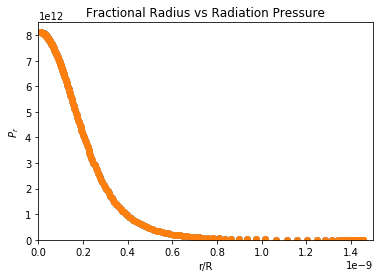

In [52]:
calc_P_r = (1/3) * ((4*5.67e-8)/3e8) * starP['T']**4

plt.scatter(starP['r'] / R[0], starP['P_rad'])
plt.scatter(starP['r'] / R[0], calc_P_r)
#plt.yscale('log')
plt.xlim(0, 1.5e-9)
plt.ylim(0, 8.5e12)
plt.xlabel(r'r/R')
plt.ylabel(r'$P_r$')
plt.title(r'Fractional Radius vs Radiation Pressure')
plt.savefig('radius_vs_rad_pressure.pdf')

In [56]:
mu_I = 1 / (starP['X'] + starP['Y']/4 + (1 - starP['X'] - starP['Y'])/20)
mu_e = 1 / ((1/2) * (1 + starP['X']))

mu = 1 / ((1 / mu_I) + (1 / mu_e))

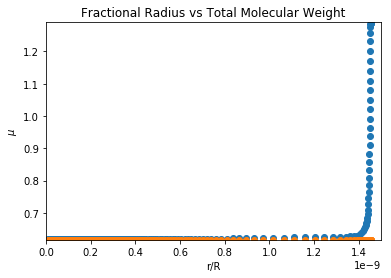

In [65]:
plt.scatter(starP['r'] / R[0], starP['mu'])
plt.scatter(starP['r'] / R[0], mu)
#plt.yscale('log')
plt.xlim(0, 1.5e-9)
plt.ylim(0.61675, 1.29)
plt.xlabel(r'r/R')
plt.ylabel(r'$\mu$')
plt.title(r'Fractional Radius vs Total Molecular Weight')
plt.savefig('radius_vs_mol_weight.pdf')

In [67]:
#The two sets of data begin to disagree near, then past the surface of the star. The reason for this discrepency is due to 
#assumptions made in our calculation of mu. The assumptions made, and those mentioned by Prialnik on page 39, are the lack of
#interactions between gas particles and that they are completley ionized. This would cause problems when reaching radii close to
#and past the surface of the star. 